In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_continuous_absolute
%store -r Y_relative_footsteps_continuous_absolute
print(X_relative_footsteps_continuous_absolute.shape)
print(Y_relative_footsteps_continuous_absolute.shape)

(2061, 32)
(2061, 4)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_continuous_absolute[:, 23] == 1)[0]
X_relative_footsteps_continuous_absolute_RL_swing = X_relative_footsteps_continuous_absolute[idxs]
Y_relative_footsteps_continuous_absolute_RL_swing = Y_relative_footsteps_continuous_absolute[idxs]

In [8]:
print("Percentage of footstep where FR and RL are swinging: ", len(idxs)/len(X_relative_footsteps_continuous_absolute) * 100)

Percentage of footstep where FR and RL are swinging:  49.58757884522076


## Predict RL foot -> x

### Linear Regression

In [11]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RL_swing[:, 2]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9959879054089209
RMSE:  0.0026176785549525653
The lowest error is:  7.468434857271777e-06
The highest error is:  0.011724818511827245
The avg. error is:  0.0017750064728219279


In [12]:
model_rl_relative_swinging_x.coef_

array([[ 2.01149543e-01, -2.22044605e-16,  1.31838984e-16,
        -3.18543647e-02,  2.71283160e-01, -7.54552447e-02,
        -2.92053290e-01, -3.27472142e-01,  1.29886396e-01,
         2.23602119e-01,  2.58664634e-01]])

In [13]:
model_rl_relative_swinging_x.intercept_

array([-0.08023396])

Text(0, 0.5, 'Predictions')

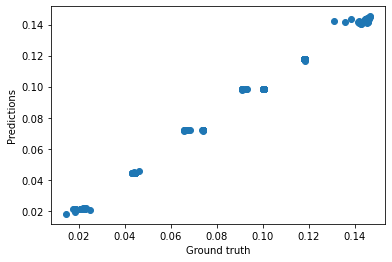

In [14]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [15]:
#%store model_rl_relative_swinging_x

In [16]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [17]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [18]:
# Input
X = np.hstack((X_relative_footsteps_continuous_absolute_RL_swing[:, :3], # motion command
               X_relative_footsteps_continuous_absolute_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_continuous_absolute_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_continuous_absolute_RL_swing[:, 3]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=100)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.07898629703082904
RMSE:  0.002150165297970212
The lowest error is:  3.9721914299462036e-06
The highest error is:  0.007259951346146765
The avg. error is:  0.001425699060583277


In [19]:
model_rl_relative_swinging_y.coef_

array([[-9.39700955e-03,  1.49880108e-15, -1.27675648e-15,
         7.13077639e-01,  8.64024411e-01, -1.45066344e-01,
         7.19563046e-01, -5.27103123e-03, -5.33764290e-01,
        -5.96638755e-01, -9.90961568e-01]])

In [20]:
model_rl_relative_swinging_y.intercept_

array([-0.38341873])

Text(0, 0.5, 'Predictions')

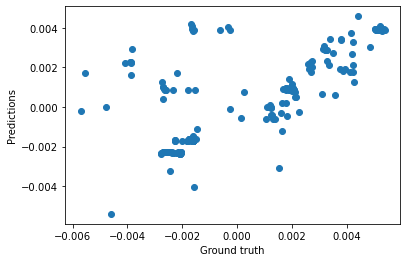

In [21]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [22]:
#%store model_rl_relative_swinging_y

In [20]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [21]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")